In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Исследование данных о российском кинопрокате



### Шаг 1. Откроем файлы с данными и объединим их в один датафрейм. 

Для начала прочитаем оба предоставленных датасета, посмотрим что в них есть, с чем предстоит работать:

In [2]:
df = pd.read_csv('./datasets/mkrf_movies.csv')
df_box = pd.read_csv('./datasets/mkrf_shows.csv')

In [3]:
df

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер"
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_box

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
...,...,...
3153,224014814,1.530000e+03
3154,224021411,9.270000e+03
3155,224022410,4.000000e+02
3156,224023210,3.600000e+02


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
df_box.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Сразу можем сделать вывод, что оба датасета можно объеденить по номеру прокатного удостоверения `puNumber`, но как мы могли заметить, тип данных в этих столбцах отличается. Приведем эти столбцы к единому типу данных и объеденим их:

In [7]:
df['puNumber'] = pd.to_numeric(df['puNumber'], errors='coerce').astype('Int64')
df_box['puNumber'] = df_box['puNumber'].astype('Int64')
df = df.merge(df_box, on='puNumber', how='left')

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверим типы данных

Изучим данные, имеющиеся в нашем распоряжении:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   Int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Проведем изменение типов данных в следующих столбцах: `show_start_date`, `ratings`, `refundable_support`, `nonrefundable_support` и `budget`:

In [9]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT12:00:00.000Z')

In [10]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [11]:
def rating(string):
    if '%' in str(string):
        return float(string[0:-1])/10
    else:
        return string

In [12]:
df['ratings'] = df['ratings'].apply(rating)

In [13]:
df['ratings'] = pd.to_numeric(df['ratings'], downcast='float')

In [14]:
df[['refundable_support', 'nonrefundable_support', 'budget']] = df[['refundable_support', 'nonrefundable_support', 'budget']].astype('Int64')

#### Шаг 2.2. Изучим пропуски в датафрейме


Изучим какую часть от всей длины датафрейма составляют пропуски:

In [15]:
df.isna().mean()

title                    0.000000
puNumber                 0.000134
show_start_date          0.000000
type                     0.000000
film_studio              0.002404
production_country       0.000267
director                 0.001202
producer                 0.075875
age_restriction          0.000000
refundable_support       0.955651
nonrefundable_support    0.955651
budget                   0.955651
financing_source         0.955651
ratings                  0.129174
genres                   0.130377
box_office               0.578146
dtype: float64

Пойдем по всем столбцам с пропусками по порядку. Для начала рассмотрим пропуска в колонке с номером прокатного удостоверения. Исходя из того, что мы видели в выводе датафрейма выше, можно сделать вывод что прокатное удостоверение выдается даже не на сам фильм (поскольку на один и тот же фильм может быть выдано несколько прокатных удостоверений (пример строки с индексами 2-4). По какой логике они выдаются нам неизвестно, соответственно заполнить их мы не имеем возможности. Оставляем эти пропуски как есть.

Далее на очереди студия-производитель фильма. Проверим, есть ли среди них фильмы, у которых повторяется название, но в одном из них студия-производитель указана, а в другой-нет. Для этого напишем функцию, которая будет проверять, есть ли для указанной колонки такие фильмы, которые несколько раз встречаются в таблице, но имеют разные пропуски:

In [16]:
def check(cat):
    return df[df['title'].isin(df[df[cat].isna()]['title'].unique()) &~ df[cat].isna()]['title'].count()

In [17]:
check('film_studio')

0

Таких фильмов нет, из чего можно сделать вывод что ошибок с технической частью при выгрузке этого столбца не было. Выведем и изучим эти строки:

In [18]:
df[df['film_studio'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.3,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,4.0,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,41225.0
6485,До и После,112014418,2018-12-05,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,6.9,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN


Среди этих фильмов ничего общего. заполним пропуска в этом столбце на `unknown`

In [19]:
df['film_studio'] = df['film_studio'].fillna('unknown')

Переходим к изучению пропусков в столбце с указанием страны-производителя. Проверим пропуски нашей функцией `check`:

In [20]:
check('production_country')

0

Пропусков, удовлетворяющим заданным условиям нет, посмотрим на фильмы, попавшие в данную категорию:

In [21]:
df[df['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,unknown,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,4.0,"мультфильм,комедия",NaN


Происхождение этих фильмов очевидно, так что можно смело заполнить эти пропуски вручную:

In [22]:
df['production_country'] = df['production_country'].fillna('Россия')

Следующий столбец с пропусками это столбец с указанием режиссера проекта. Проверим этот столбце нашей функцией:

In [23]:
check('director')

0

Пропусков, удовлетворяющим нашим критериям нет. Выведем строки с отсутствующими режиссерами и изучим их:

In [24]:
df[df['director'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,NaN,NaN,44350.0
1735,Помпеи. Британский музей,126003413,2013-09-11,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,7.9,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,unknown,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,4.0,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,6.7,"концерт,музыка",NaN


В основном это записи концертов, хотя есть и другие типы фильмов. Так же заполним пропуски спомощью `unknown`:

In [25]:
df['director'] = df['director'].fillna('unknown')

Изучим столбец с указанием продюссера:

In [26]:
check('producer')

8

In [27]:
titles = list(set(df[df['title'].isin(df[df['producer'].isna()]['title'].unique()) &~ df['producer'].isna()]['title'].to_list()))
for title in titles:
    display(df[(df['title'] == title)])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
266,Прощание,111029414,2014-12-24,Художественный,"Киностудия ""Мосфильм""",СССР,Э.Климов,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,7.2,драма,NaN
5514,Прощание,211037617,2017-09-07,Художественный,Всероссийский государственный институт кинемат...,Россия,А.Петровская,В.Найговзина,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.2,драма,NaN
6909,Прощание,111007519,2019-05-01,Художественный,ИП Киселев Алексей Евгеньевич,Россия,М.Фомина,А.Киселев,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.2,драма,NaN
7281,Прощание,121028719,2019-10-07,Художественный,"Биг Бич Филмз, Депз оф Филд, Киндред Спирит",США,Лулу Ванг,"Анита Го, Даниэль Тейт Мелиа, Эндрю Миано",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.2,драма,2617932.5


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
86,Валентина,111012713,2013-12-19,Художественный,"Киностудия ""Мосфильм""",СССР,Г.Панфилов,NaN,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,7.5,драма,NaN
6899,Валентина,112003919,2019-05-03,Документальный,"ООО Кинокомпания ""Мастерская""",Россия,Д.Былинушкина,"С.Медведева, Ю.Медведева, М.Стрелкова, В.Черкашин",«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,7.5,драма,NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3268,Ложные признания,121034216,2016-12-21,Художественный,"Арт Франс, Идеаль Аудиенс, Маха Продюксьон, Од...",Франция,Люк Бонди,NaN,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,5.4,"драма,комедия",1242819.0
6870,Ложные признания,126001119,2019-04-26,Прочие,Гуд Компани Пикчерз,Дания - США,Катрин Филип,"Рейнхарт Бетц, Пол Видерхольд, Катрин Шальстрём",«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,5.4,"драма,комедия",NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5430,Вторжение,124002417,2017-08-01,Анимационный,Баобаб Студиос,США,Эрик Дарнелл,NaN,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,5.7,"фантастика,боевик",NaN
7474,Вторжение,111022519,2019-12-23,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000,400000000,944000000,Фонд кино,5.7,"фантастика,боевик",NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
309,Успех,111027414,2014-12-24,Художественный,"Киностудия ""Мосфильм""",СССР,К.Худяков,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,7.8,драма,NaN
5937,Успех,111008418,2018-06-14,Художественный,Сунцов Валентин Валерьевич,Россия,В.Сунцов,В.Сунцов,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,7.8,драма,NaN
7322,Успех,111018519,2019-11-04,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент",«12+» - для детей старше 12 лет,5000000,20000000,75000000,Фонд кино,7.8,драма,3181218.0


Наша функция наконец-то нашла несколько фильмов, с повторяющимися названиями, но имеющих разные данные в указанном нами столбце. К сожалению, при ближайшем изучении этих картин можно сделать вывод, что это разные фильмы с одним названием. Так что все также заполняем пропуска `unknown`:

In [28]:
df['producer'] = df['producer'].fillna('unknown')

Слудющие пропуски идут в столбцах `refundable_support`, `nonrefundable_support`. Проверим их нашей функцией:

In [29]:
print(check('refundable_support'))
print(check('nonrefundable_support'))

5
5


In [30]:
titles = list(set(df[df['title'].isin(df[df['refundable_support'].isna()]['title'].unique()) &~ df['refundable_support'].isna()]['title'].to_list()))
for title in titles:
    display(df[(df['title'] == title)])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5829,Прощаться не будем,111003418,2018-06-21,Художественный,"ООО ""РФГ Корп"", ООО ""Студия ""МОСТ""",Россия,П.Дроздов,А.Петрухин,«6+» - для детей старше 6 лет,0,35000000,109814241,Министерство культуры,5.8,"военный,драма,история",5539973.15
6360,Прощаться не будем,111021318,2018-11-06,Художественный,"ООО ""Студия ""МОСТ"", ООО ""РФГ Корп""",Россия,П.Дроздов,А.Петрухин,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,5.8,"военный,драма,история",NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3614,Три сестры,111004417,2017-06-09,Художественный,"ООО ""РТВ"", АО ""ТПО ""Киностудия им. М.Горького""...",Россия,Ю.Грымов,"Ю.Грымов, С.Зернов",«16+» - для детей старше 16 лет,0,25000000,37878787,Министерство культуры,NaN,NaN,1067649.0
6725,Три сестры,114001219,2019-03-15,Анимационный,"ФГУП ""ТПО ""Киностудия ""Союзмультфильм""",Россия,С.Андрианова,Б.Машковцев,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5430,Вторжение,124002417,2017-08-01,Анимационный,Баобаб Студиос,США,Эрик Дарнелл,unknown,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,5.7,"фантастика,боевик",NaN
7474,Вторжение,111022519,2019-12-23,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000,400000000,944000000,Фонд кино,5.7,"фантастика,боевик",NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6488,Мысленный волк,111023718,2019-06-01,Художественный,"ООО САГа""",Россия,Валерия Гай Германика,"Андрей Савельев, Артем Васильев",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,5.3,"фэнтези,драма,фильм-нуар",NaN
6898,Мысленный волк,111007419,2019-06-09,Художественный,"ООО ""САГА""",Россия,Валерия Гай Германика,"А.Савельев, А.Васильев, Валерия Гай Германика",«16+» - для детей старше 16 лет,0,30000000,48000000,Министерство культуры,5.3,"фэнтези,драма,фильм-нуар",2258384.0


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
309,Успех,111027414,2014-12-24,Художественный,"Киностудия ""Мосфильм""",СССР,К.Худяков,unknown,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,7.8,драма,NaN
5937,Успех,111008418,2018-06-14,Художественный,Сунцов Валентин Валерьевич,Россия,В.Сунцов,В.Сунцов,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,7.8,драма,NaN
7322,Успех,111018519,2019-11-04,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент",«12+» - для детей старше 12 лет,5000000,20000000,75000000,Фонд кино,7.8,драма,3181218.0


А вот тут ситуация уже интереснее. Мы имеем 3 группы фильмов, у которых просто совпали названия, и 2 повторяющихся фильма, под разными прокатными удостоверениями. Заполнить в этих 2ух фильмах пропуски в столбцах поддержки у нас не получится, поскольку в этом случае эти данные будут учтены дважды. Оставим пропуски в столбцах `refundable_support`, `nonrefundable_support`, `budget` и `financing_source` как есть. Поскольку для столбцов о поддержке и источнике поддержки пропуски это просто отсутствие этой поддержки.

Далее следуют пропуска в столбце `raitings`:

In [31]:
check('ratings')

0

Просто так заполнить этот столбец мы не можем, оставляем пропуски. Перейдем к столбу с указанием жанра фильма:

In [32]:
check('genres')

0

Жанры мы также не сможем заполнить, но тут мы можем заполнить пропуски на `unknown`:

In [33]:
df['genres'] = df['genres'].fillna('unknown')

И последний столбец это сборы. В нем пропуски мы сможем заполнить, разве что только вручную, а искать информацию о сборах для 4 тыс. фильмов это сизифов труд. Будем надеятся, что имеющихся данных о сборах будет достаточно для анализа.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7485 non-null   Int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7486 non-null   object        
 5   production_country     7486 non-null   object        
 6   director               7486 non-null   object        
 7   producer               7486 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    Int64         
 10  nonrefundable_support  332 non-null    Int64         
 11  budget                 332 non-null    Int64         
 12  financing_source       332 non-null    object        
 13  rat

#### Шаг 2.3. Изучим дубликаты в датафрейме

Для начала сделаем самое очевидное: проверим, нет ли в датафрейме явных дубликатов:

In [35]:
df.duplicated().sum()

0

Явных дубликатов нет. Но ранее мы заметили, что могут быть два разных прокатных удостоверения на один и тот же фильм, в зависимости, возможно, от даты проката. Проверим, если ли дублирование номеров прокатных удостоверений:

In [36]:
df['puNumber'].duplicated().sum()

2

Есть два таких фильма. Взглянем на них поближе:

In [37]:
nums = df[df['puNumber'].duplicated()]['puNumber'].unique()
for num in nums:
    display(df[df['puNumber'] == num])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.6,"драма,мелодрама,история",NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,6.8,"комедия,криминал",NaN


После проверки данных по этим прокатным удостоверениям на сайте минкульта, можно сделать вывод, что либо у министерства культуры произошла ошибка при выдаче номера прокатного удостоверения, либо одно прокатное удостоверение может распространяться на несколько фильмов, что странно. Но по сути это 4 разных фильма с совпадающими номерами прокатных удостоверений.

Далее проверим дубликаты в столбце с названиями фильмов:

In [38]:
df[df['title'].isin(
    df[df['title'].duplicated()]['title'].unique()
)].groupby('title')['title'].count()

title
100 миллионов евро                   2
127 часов                            2
13 часов: Тайные солдаты Бенгази     2
13-й район: Кирпичные особняки       2
13.                                  2
                                    ..
Эскадрилья "Лафайет"                 2
Этим утром в Нью-Йорке               2
Я ненавижу день святого Валентина    2
Я, снова я и мама                    2
Ян Антонышев                         2
Name: title, Length: 558, dtype: int64

Оказалось, что некоторые фильмы выходили в прокат по несколько раз. И на каждый прокат имелся свой номер прокатного удостоверения. Кроме того, существуют разные фильмы, у которых просто совпадает название.

#### Шаг 2.4. Изучим категориальные значения


Изучим значения столбца с типом фильма:

In [39]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Мы можем наблюдать, что у некоторых категорий в начале присутствует пробел, и поэтому они считаются другим типом фильма. Исправим это, заменив значения с пропусками на корректные.

In [40]:
df['type'] = df['type'].replace([' Художественный', ' Анимационный'], ['Художественный', 'Анимационный'])

In [41]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Проверим другие столбцы:

In [42]:
df['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [43]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [44]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [45]:
df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'unknown', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комед

Можно заметить, что в столбце с информацией о стране-производителе существует проблема с разделителем в тех фильмах, где указано несколько стран. Причем проблема усложняется разным количеством пробелов между элементами, элементами-разделителями и наличием пробелов внетри названий самих стран. Приведем этот столбец к одному виду:

In [46]:
df['production_country'] = df['production_country'].str.replace('-', ',').str.replace(' , ', ',').str.replace(' ,', ',').str.replace(', ', ',')

Итак, единообразие достигнуто. Перейдем к следующему пункту.

#### Шаг 2.5. Проверим количественные значения


Изучим данные, которые даны нам в следующих столбцах: `refundable_support`, `nonrefundable_support`, `budget`, `box_office`:

In [47]:
df[~df[['refundable_support', 'nonrefundable_support', 'budget', 'box_office']].isna()][['refundable_support', 'nonrefundable_support', 'budget', 'box_office']].describe()

,refundable_support,nonrefundable_support,budget,box_office
count,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
std,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04
50%,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06
75%,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07
max,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


Можно заметить, что у нас встречаются нулевые значения в этих столбцах, вместо пропусков. Уберем нулевые значения, заменив их пропусками:

In [48]:
df[['refundable_support', 'nonrefundable_support', 'budget', 'box_office']] = df[['refundable_support', 'nonrefundable_support', 'budget', 'box_office']].replace(0, np.nan)

In [49]:
df[~df[['refundable_support', 'nonrefundable_support', 'budget', 'box_office']].isna()][['refundable_support', 'nonrefundable_support', 'budget', 'box_office']].describe()

,refundable_support,nonrefundable_support,budget,box_office
count,1.110000e+02,3.230000e+02,3.150000e+02,3.134000e+03
mean,3.548649e+07,5.034578e+07,1.340961e+08,7.706437e+07
std,3.197288e+07,6.024321e+07,1.912260e+08,2.411784e+08
min,3.500000e+06,3.000000e+06,1.446246e+07,4.000000e+01
25%,1.500000e+07,2.500000e+07,4.615387e+07,1.010288e+05
50%,2.500000e+07,3.000000e+07,7.337955e+07,2.409099e+06
75%,5.000000e+07,4.500000e+07,1.500043e+08,2.456979e+07
max,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


Теперь можно сделать выводы, применив метод `describe`. Мы видим, что колонка `box_office` имеет странные минимальные значения. Да и средние значения этого столбца не соотносятся с столбцом бюджета фильма. Извучим эти данные подробнее, отсортировав данные по колонке `box_office` и выведя строки с 10 минимальными значениями:

In [50]:
df[~df['box_office'].isna()].sort_values(by='box_office').head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
151,Жестокий романс,111006013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,Э.Рязанов,unknown,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,8.1,"драма,мелодрама,история",40.0
2274,Каменный цветок.,111016714,2014-12-01,Художественный,"Киностудия ""Мосфильм""",СССР,А.Птушко,unknown,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,7.1,"фэнтези,драма,мелодрама",50.0
3917,22 пули: Бессмертный,121006410,2010-04-01,Художественный,Еуроп Корпорейшн,Франция,Ришар Бери,"Люк Бессон, Дидье Хорау, Пьер-Анж Ле Погам",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.1,"боевик,драма,криминал",75.0
1180,Астерикс и Обеликс в Британии 3D,121025012,2012-10-05,Художественный,"Уайлд Банч, Фиделите Фильм, Филм Кайрос, Синет...","Франция,Италия,Испания,Венгрия",Лоран Тирар,"Оливье Делбоск, Марк Миссонье",«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,5.6,"комедия,приключения,семейный",80.0
164,За спичками,111006113,2013-10-18,Художественный,"Киностудия ""Мосфильм"", ""СУОМИ-ФИЛЬМ""","СССР,Финляндия","Л.Гайдай, Р.Орко",unknown,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,7.5,"комедия,приключения,история",100.0
4063,Ловец ветра,111009310,2010-10-21,Художественный,"ГУП РБ Киностудия ""Башкортостан""",Россия,А.Юмагулов,А.Юнусов,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.5,"драма,комедия",100.0
211,Одиноким предоставляется общежитие,111018614,2014-12-01,Художественный,"Киностудия ""Мосфильм""",СССР,С.Самсонов,unknown,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,7.8,"мелодрама,комедия",100.0
1499,Лучшие дни впереди,121023413,2013-09-03,Художественный,"Ле Фильм дю Киоск, 27.11 Продюксьон, Директ си...",Франция,Марион Верну,"Франсуа Краус, Дени Пино-Валенсьенн",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,6.6,"драма,комедия",100.0
351,Волшебное приключение,124000905,2015-01-18,Анимационный,"Экшион Филмз, Патэ Синема, Болексбразерс","Великобритания,Франция",Дэйв Бортвик,"Клауди Горский, Энди Лэйтон, Лаурен Родон, Пас...",«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,5.7,"мультфильм,фэнтези,комедия",100.0
1269,Обещание /По произведению Стефана Цвейга/,121009914,2014-05-19,Художественный,"Фиделите Фильм, Уалд Банч, Скоуп Пикчерз, Оран...","Франция,Бельгия",Патрис Леконт,"Оливье Дебоск, Кристин де Жекель, Марк Миссонье",«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,7.1,"боевик,драма,приключения",100.0


Значения сборов в 100 рублей выглядят уже даже не странно, а абсурдно. Что-то с этими значениями не так. Будем разбираться. Для начала посмотрим, сколько фильмов имеют нереалистичное значение в столбце `box_office`:

In [51]:
df[df['box_office'] <= 100000]['box_office'].count()

782

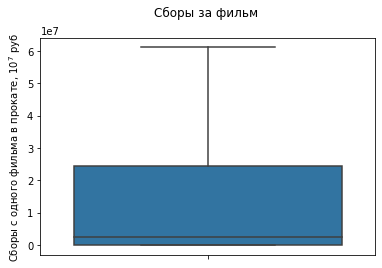

In [52]:
ax = sns.boxplot(data = df, y='box_office', showfliers=False)
ax.set_title('Сборы за фильм \n')
ax.set_ylabel(ylabel='Сборы с одного фильма в прокате, 10$^7$ руб')
plt.show()

Как мы видим, фильмов у которых странно низкие значения в столбце сборов - много. При рассмотрении общей картины нам придется отфильтровывать данные результаты, по той причине, что мы не знаем почему и по какой логике эти строки имеют настолько низкие значения. Будем принимать за корректные значения от 100000.

#### Шаг 2.6. Добавим новые столбцы





In [53]:
df['year'] = df['show_start_date'].apply(lambda x: x.year)

Напишем функцию, которая будет разделять строку про символу "," и возвращать первое значение в получившемся списке.

In [54]:
def first_value(string):
    return string.split(',')[0]

In [55]:
df['main_director_name'] = df['director'].apply(first_value)

In [56]:
df['main_genre'] = df['genres'].apply(first_value)

- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [57]:
df['support_raito'] = (df['refundable_support'].fillna(0) + df['nonrefundable_support'].fillna(0)) / df['budget']

### Шаг 3. Проведем исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах:

In [58]:
df.groupby('year')['box_office'].count()

year
2010    101
2011    109
2012    123
2013    179
2014    273
2015    462
2016    525
2017    357
2018    475
2019    530
Name: box_office, dtype: int64

In [59]:
df['box_office'].isna().mean()

0.5813518567993589

Почти у 42% есть информация о прокате в кинотеатрах.

Изучим, как менялась динамика проката по годам.

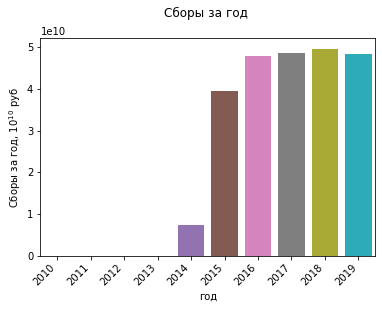

In [60]:
ax = sns.barplot(data = df.groupby('year')['box_office'].sum().reset_index().query('box_office > 100000'), x='year', y='box_office')
ax.set_title('Сборы за год \n')
ax.set_xlabel(xlabel='год')
ax.set_ylabel(ylabel='Сборы за год, $10^1$$^0$ руб')
plt.xticks(rotation=45, ha='right')
plt.show()

Судя по графику, данные о сборах начали вносить с конца 2014 года. Поэтому мы можем рассматривать только года с 2015 до 2019. В целом, в 2015 году была минимальная сумма сборов, а в 2018-максимальная. Отобразим максимальные значения для этих годов:

In [61]:
df[df['year'] > 2014].groupby('year')['box_office'].sum().describe()

count    5.000000e+00
mean     4.680430e+10
std      4.136626e+09
min      3.949737e+10
25%      4.786630e+10
50%      4.842571e+10
75%      4.856371e+10
max      4.966840e+10
Name: box_office, dtype: float64

Минимальное значение - 39,5 миллиарда рублей в 2015 году, максимальное - 49,7 миллиарда рублей в 2018 году.

помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [62]:
df.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
year,,
2010,2.404608e+04,1710.000
2011,1.293832e+05,3000.000
2012,5.654815e+04,6220.000
2013,1.664788e+05,3580.000
2014,2.727089e+07,20400.000
2015,8.549213e+07,5003450.150
2016,9.117390e+07,3915041.020
2017,1.360328e+08,9968340.000


Из этой таблицы можно сделать вывод о том, что не смотря на то, что максимальные сборы были достигнуты в 2018 году, максимальные средние и медианные значения сборов были достигнуты в 2017 году. А максимальный уровень сборов был достигнут за счет количества фильмов, а не их сборов.

Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год.

Создадим отдельный столбец, с сокращенной записью возрастной категории:

In [63]:
def age_short(string):
    return string.split('«')[1].split('»')[0]

In [64]:
df['age_short'] = df['age_restriction'].apply(age_short)

Создадим графики, показывающие сборы фильмов для каждой возрастной категории за определенный год:

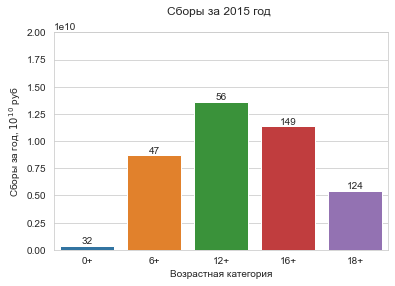

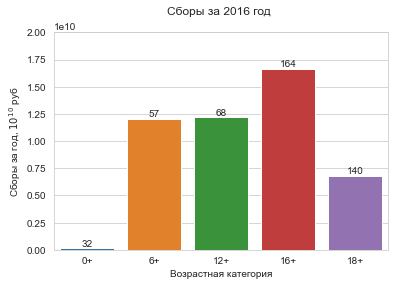

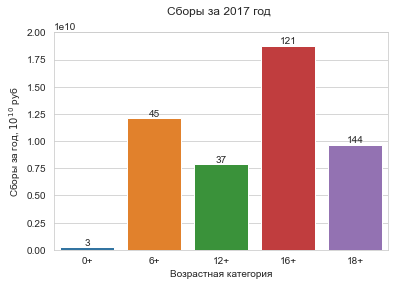

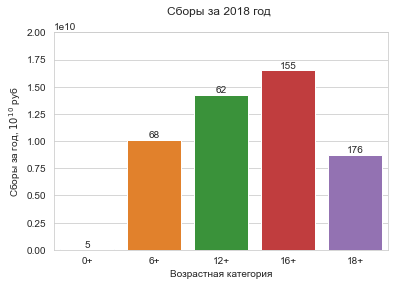

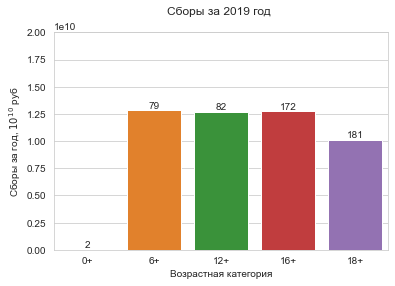

In [65]:
cats = ['0+', '6+', '12+', '16+', '18+']
for year in df.query('year > 2014')['year'].unique():
    sns.set_style("whitegrid")
    ax = sns.barplot(data = df[df['year'] == year].groupby('age_short')['box_office'].sum().reindex(cats).reset_index().query('box_office > 100000'), x='age_short', y='box_office')
    rects = ax.patches    
    lst = []
    for age in cats:
        lst.append(df[(df['year'] == year) & (df['age_short'] == age)].query('box_office > 100000')['title'].count())
    for rect, label in zip(rects, lst):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha='center', va='bottom')
    ax.set_title(f'Сборы за {year} год \n')
    ax.set_xlabel(xlabel='Возрастная категория')
    ax.set_ylabel(ylabel='Сборы за год, $10^1$$^0$ руб')
    plt.ylim((0,2e10))
    plt.show()

Над общим значением сборов указано количество фильмов, которые эти сборы обеспечили. Из этих графиков можно сделать вывод о том, что не смотря на то, что фильмы категории "16+" хоть и обеспечили бОльшую часть сборов, каждый фильм по отдельности собрал кассу меньшую, чем, например, фильмы категории "6+" и "12+". Изменение соотношения сборов для каждой категории можно объяснить количеством фильмов, выходящих для каждой категории. Например в 2017 году мы видим, что фильмов "6+" и "12+" выходило гораздо меньше чем в другие года, и из-за этого присутствует спад сборов для фильмов этой категории в этом году.

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку

Создадим столбец, в котором будет посчитана суммарная полученная поддержка:

In [66]:
df['total_support'] = (df['refundable_support'].fillna(0) + df['nonrefundable_support'].fillna(0))
df['total_support'] = df['total_support'].replace(0, np.nan)

Изучим корреляцию рейтинга фильма и его сборов от полученной поддержки:

In [67]:
df[~df['total_support'].isna()][['ratings', 'box_office', 'total_support']].corr()

,ratings,box_office,total_support
ratings,1.000000,0.143755,0.102222
box_office,0.143755,1.000000,0.488976
total_support,0.102222,0.488976,1.000000


Отсюда мы видим низкую зависимость рейтинга получивших поддержку фильмов от полученной поддержки. Также можно заметить, что сборы имеют более ярко выраженную зависимость от полученной поддержки. Следовательно, можно сделать вывод, что средства выделенные на поддержку влияют не на качество конечного продукта, а на его продвижение и рекламу.

Изучим показатели рейтинга для фильмов, получивших поддержку:

In [68]:
df[~df['total_support'].isna()]['ratings'].describe()

count    316.000000
mean       6.020885
std        1.148944
min        1.000000
25%        5.300000
50%        6.200000
75%        6.700000
max        9.400000
Name: ratings, dtype: float64

В основном эти фильмы имеют весьма невысокий балл, в районе 5,5-6,5. Это может означать только то, что выбор фильмов получающих поддержку весьма сомнителен.

Добавим столбец, с показателем окупаемости фильмов, получивших поддержку:

In [69]:
df['payback_ratio'] = df[~df['total_support'].isna()]['box_office'] / df[~df['total_support'].isna()]['budget']
df['payback_ratio'].describe()

count         315
mean          NaN
std          <NA>
min           NaN
25%      0.019466
50%      0.148664
75%      0.858777
max           NaN
Name: payback_ratio, dtype: object

In [70]:
df[df['payback_ratio'] < 1]['payback_ratio'].count() / df['payback_ratio'].count()

0.746031746031746

Всего 22% фильмов, получивших поддержку смогли окупиться в прокате (и это еще мы не учитывали часть от сборов, которую оставляют себе кинотаетры, а это порядка 50% от стоимости билета).

Посчитаем, сколько приносят фильмы, получившие поддержку своим создателям:

In [71]:
(df[~df['total_support'].isna()]['box_office'] - df[~df['total_support'].isna()]['budget'] + df[~df['total_support'].isna()]['nonrefundable_support']).describe()

count            307
mean             NaN
std             <NA>
min              NaN
25%      -37996434.0
50%      -13759195.0
75%      22247452.17
max              NaN
dtype: object

Большая часть таких фильмов даже убыточна, но есть и исключения из правила, которые и поднимают среднее значение на уровень в 41 миллион рублей (следует также учитывать, что для некоторых фильмов была выделена поддержка на безвозвратной основе, что покрыло часть затрат на стадии производства).

Теперь обратим внимание на то, фильмы каких жанров чаще всего получают государственную поддержку:

In [72]:
df[~df['total_support'].isna()].groupby('main_genre')['main_genre'].count().sort_values(ascending=False).head()

main_genre
драма         93
комедия       74
мультфильм    31
unknown       16
триллер       15
Name: main_genre, dtype: int64

Чаще всего средства выделяются на драмы и комедии. Изучим окупаемость даных жанров:

In [73]:
df[~df['total_support'].isna()].pivot_table(index='main_genre', values='payback_ratio', aggfunc='mean').sort_values(by='payback_ratio', ascending=False)

,payback_ratio
main_genre,
спорт,2.408273
комедия,1.527474
биография,1.136724
ужасы,1.050834
мультфильм,0.997862
военный,0.857312
семейный,0.752485
unknown,0.73432
боевик,0.593031


Не смотря на то, что жанр "драма" получает поддержку чаще всего, окупается он далеко не так хорошо. В то же время комедии в среднем имеют неплохую окупаемость (хотя при вычете доли кинотеатра они окупаться перестанут). Стабильнее всего окупается спортивный жанр.

Теперь изучим какой из источников поддержки более рационально тратит средства на поддержку фильмов:

In [74]:
df[~df['total_support'].isna()].pivot_table(index='financing_source', values=['ratings', 'payback_ratio'], aggfunc='mean')

,payback_ratio,ratings
financing_source,,
Министерство культуры,0.403936,6.152941
"Министерство культуры, Фонд кино",0.170092,6.438095
Фонд кино,1.280543,5.816901


Когда Минкульт объеденяется с Фондом кино для поддержки фильма, чаще всего получается неплохое кино с крайне низкой окупаемостью. Также можно заметить, что Министерство культуры поддерживает фильмы со средним рейтингом выше, чем Фонд кино, но их окупаемость ниже.

Обратим внимание на количество средств как возвратных, так и не-возвратных, потраченных на поддержку каждой из организаций:

In [75]:
df[~df['total_support'].isna()].pivot_table(index='financing_source', values=['refundable_support', 'nonrefundable_support'], aggfunc='sum')

,nonrefundable_support,refundable_support
financing_source,,
Министерство культуры,4836661000,0
"Министерство культуры, Фонд кино",859931354,325500000
Фонд кино,10565095958,3613500000


Минестерсво культуры выдет средства на безвозвратной основе, а Фонд кино - как на возвратной, так и на безвозратной основе.

### Шаг 5. Напишите общий вывод

На основе имеющихся данных, можно сказать что основную часть прибыли приносят фильмы не получавшие поддержки от государства (чаще всего эти фильмы вообще не приносят доход). Лучшие сборы на фильм показывают фильмы возрастных категорий "6+" и "12+", в то время, как наибольшие суммарные сборы относятся к категории "16+" (в основном потому, что фильмов этой категории больше всего). В ходе исследования также было отмечено, что фильмы, получившие государственную поддержку имеют невысокий рейтинг и в подавляющем большинстве не окупаются. Чаще всего поддержку получают драмы и комедии, но драмы плохо окупаются. В целом складывается впечатление, что Министерству культуры и Фонду кино стоит пересмотреть критерии, по которым оказывается поддержка и вести более жесткий контроль над тратой выделяемых средств, поскольку на данный момент качество и окупаемость фильмов весьма слабо зависит от оказаной государством поддержки.